In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/var/pyenv/versions/3.7.4/envs/env374/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/var/pyenv/versions/3.7.4/envs/env374/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/var/pyenv/versions/3.7.4/envs/env374/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint1

In [2]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
# import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
batch_size = 32
num_classes = 2
epochs = 700
data_augmentation = True
num_predictions = 2
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Keras_change_700_1phase_split100.h5'

In [17]:
imHog_list = []
im_flt = []

with open('/home/xiaoran/Dropbox/svm_Over3/flipnames.txt') as f:
    nn = f.readlines()
    names = [x.strip() for x in nn] 

num = 0    
for name in names:
    img = cv2.imread('/home/xiaoran/Dropbox/svm_Over3/resize/'+name)
#     img = ToZero('/home/xiaoran/Dropbox/ANN/resize/'+name)
#    im = cv2.imread('/home/xiaoran/Dropbox/svm/resized/'+name)
#    img = cv2.cvtColor( im, cv2.COLOR_RGB2GRAY )
#    fd, hog_image = hog(img, orientations= 12, pixels_per_cell=(12, 12),
#                    cells_per_block=(1, 1), visualise=True)
    fd = img.flatten()
    im_flt.append(fd)
    imHog_list.append(img)
    num = num + 1

len(names)

2097

In [18]:
label_array = np.zeros((len(names),1))
with open('/home/xiaoran/Dropbox/svm_Over3/flipLabel_values.txt') as f:
    vals = f.readlines()
    vals = [x.strip() for x in vals] 
k = 0 
for val in vals:
    label_array[k,0] = val
    k = k+1
   
im_array = np.asarray(imHog_list)
im_flt_arr = np.asarray(im_flt)

In [19]:
# misMatch = [76,78,84,277,281,306,380,382,393,534,674,1229,1289,1310,1322,1427,1436,1553,1619,1637,1640,1697,
#                      1706,1745,1766,1775,1874,1985,2033,2057,2078,2126,2174,2177,2225,2291]

In [20]:
# assign variables to X and y
Xraw = im_array
yraw = label_array

# sc = StandardScaler()
# sc.fit(Xraw)
# Xraw = sc.transform(Xraw)

n = np.arange(500,500)

X = np.delete(Xraw, n, axis=0)
y = np.delete(yraw, n, axis=0)
X_r = X[:50]
y_r = y[:50]
X_left = X[2000:]
y_left = y[2000:]

X_lr = np.concatenate((X_r, X_left), axis=0)
y_lr = np.concatenate((y_r, y_left), axis=0)

# for i in misMatch:
#     y[i] = 1 - y[i]
# split training set and test set
x_train, x_test, y_train, y_test = train_test_split(X[50:2000], y[50:2000], test_size=0.3, random_state=42)
print('y_train shape:', y_train.shape)
print('x_train shape:', x_train.shape)
print('X shape:', X.shape)
X_out = im_flt_arr 
print('X_lr shape:', X_lr.shape)

y_train shape: (1365, 1)
x_train shape: (1365, 32, 32, 3)
X shape: (2097, 32, 32, 3)
X_lr shape: (147, 32, 32, 3)


In [21]:
# np.savetxt("/home/xiaoran/Dropbox/CNN/yraw.csv",y, delimiter=',', header="y", comments="")
# # np.savetxt("/home/xiaoran/Dropbox/CNN/Xraw.csv",X, delimiter=',', header="X", comments="")

# import csv

# with open("/home/xiaoran/Dropbox/CNN/X_out.csv",'w', newline="") as f:
#     writer = csv.writer(f)
#     writer.writerows(X_out)

In [22]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_left = keras.utils.to_categorical(y_left, num_classes)
print('y_train shape:', y_train.shape)
print('y_left shape:', y_left.shape)

y_train shape: (1365, 2)
y_left shape: (97, 2)


In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# #########add a new layer####################
# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
#######################################################

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [ ]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    hist = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=int(np.ceil(x_train.shape[0] / float(batch_size))),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    print(hist.history)

Using real-time data augmentation.
Epoch 1/700
43/43 [==============================] - 7s 173ms/step - loss: 6.2276 - acc: 0.5460 - val_loss: 2.0353 - val_acc: 0.8530
Epoch 2/700
43/43 [==============================] - 5s 128ms/step - loss: 4.6724 - acc: 0.6471 - val_loss: 2.2745 - val_acc: 0.8581
Epoch 3/700
43/43 [==============================] - 5s 124ms/step - loss: 3.6230 - acc: 0.7223 - val_loss: 2.2868 - val_acc: 0.8581
Epoch 4/700
43/43 [==============================] - 6s 146ms/step - loss: 3.1881 - acc: 0.7659 - val_loss: 2.2868 - val_acc: 0.8581
Epoch 5/700
43/43 [==============================] - 8s 179ms/step - loss: 2.9256 - acc: 0.7848 - val_loss: 2.2868 - val_acc: 0.8581
Epoch 6/700
43/43 [==============================] - 6s 141ms/step - loss: 3.0071 - acc: 0.7884 - val_loss: 2.2868 - val_acc: 0.8581
Epoch 7/700
43/43 [==============================] - 6s 137ms/step - loss: 2.7041 - acc: 0.8037 - val_loss: 2.2865 - val_acc: 0.8581
Epoch 8/700
43/43 [===============

Epoch 62/700
43/43 [==============================] - 5s 115ms/step - loss: 0.7044 - acc: 0.7797 - val_loss: 0.3561 - val_acc: 0.8581
Epoch 63/700
43/43 [==============================] - 5s 114ms/step - loss: 0.6406 - acc: 0.7982 - val_loss: 0.3678 - val_acc: 0.8496
Epoch 64/700
43/43 [==============================] - 5s 116ms/step - loss: 0.5683 - acc: 0.8001 - val_loss: 0.4226 - val_acc: 0.7966
Epoch 65/700
43/43 [==============================] - 5s 117ms/step - loss: 0.5627 - acc: 0.8056 - val_loss: 0.4386 - val_acc: 0.7863
Epoch 66/700
43/43 [==============================] - 5s 116ms/step - loss: 0.4816 - acc: 0.8084 - val_loss: 0.3842 - val_acc: 0.8496
Epoch 67/700
43/43 [==============================] - 5s 119ms/step - loss: 0.5287 - acc: 0.8026 - val_loss: 0.4238 - val_acc: 0.8034
Epoch 68/700
43/43 [==============================] - 5s 116ms/step - loss: 0.4962 - acc: 0.8164 - val_loss: 0.3920 - val_acc: 0.8496
Epoch 69/700
43/43 [==============================] - 5s 117ms

Epoch 123/700
43/43 [==============================] - 5s 116ms/step - loss: 0.4420 - acc: 0.8197 - val_loss: 0.4433 - val_acc: 0.7726
Epoch 124/700
43/43 [==============================] - 5s 116ms/step - loss: 0.4289 - acc: 0.8252 - val_loss: 0.4280 - val_acc: 0.8205
Epoch 125/700
43/43 [==============================] - 5s 117ms/step - loss: 0.4389 - acc: 0.8255 - val_loss: 0.4299 - val_acc: 0.8154
Epoch 126/700
43/43 [==============================] - 5s 117ms/step - loss: 0.4379 - acc: 0.8295 - val_loss: 0.4322 - val_acc: 0.8051
Epoch 127/700
43/43 [==============================] - 5s 123ms/step - loss: 0.4278 - acc: 0.8299 - val_loss: 0.4559 - val_acc: 0.7265
Epoch 128/700
43/43 [==============================] - 6s 129ms/step - loss: 0.4103 - acc: 0.8252 - val_loss: 0.4181 - val_acc: 0.8239
Epoch 129/700
43/43 [==============================] - 5s 123ms/step - loss: 0.4186 - acc: 0.8262 - val_loss: 0.4095 - val_acc: 0.8376
Epoch 130/700
43/43 [==============================] - 

Epoch 184/700
43/43 [==============================] - 5s 119ms/step - loss: 0.4287 - acc: 0.8346 - val_loss: 0.4517 - val_acc: 0.7419
Epoch 185/700
43/43 [==============================] - 5s 118ms/step - loss: 0.4207 - acc: 0.8346 - val_loss: 0.4303 - val_acc: 0.7932
Epoch 186/700
43/43 [==============================] - 5s 122ms/step - loss: 0.4318 - acc: 0.8324 - val_loss: 0.4136 - val_acc: 0.8188
Epoch 187/700
43/43 [==============================] - 5s 125ms/step - loss: 0.4150 - acc: 0.8408 - val_loss: 0.4399 - val_acc: 0.7812
Epoch 188/700
43/43 [==============================] - 6s 130ms/step - loss: 0.4170 - acc: 0.8288 - val_loss: 0.4379 - val_acc: 0.7744
Epoch 189/700
43/43 [==============================] - 6s 130ms/step - loss: 0.4096 - acc: 0.8393 - val_loss: 0.4517 - val_acc: 0.7504
Epoch 190/700
43/43 [==============================] - 6s 132ms/step - loss: 0.4209 - acc: 0.8350 - val_loss: 0.4234 - val_acc: 0.8068
Epoch 191/700
43/43 [==============================] - 

Epoch 245/700
43/43 [==============================] - 5s 122ms/step - loss: 0.4198 - acc: 0.8368 - val_loss: 0.4160 - val_acc: 0.8103
Epoch 246/700
43/43 [==============================] - 5s 122ms/step - loss: 0.3948 - acc: 0.8473 - val_loss: 0.3979 - val_acc: 0.8291
Epoch 247/700
43/43 [==============================] - 5s 118ms/step - loss: 0.4075 - acc: 0.8444 - val_loss: 0.3854 - val_acc: 0.8376
Epoch 248/700
43/43 [==============================] - 5s 117ms/step - loss: 0.3845 - acc: 0.8375 - val_loss: 0.3764 - val_acc: 0.8410
Epoch 249/700
43/43 [==============================] - 5s 118ms/step - loss: 0.4030 - acc: 0.8423 - val_loss: 0.4177 - val_acc: 0.8085
Epoch 250/700
43/43 [==============================] - 5s 118ms/step - loss: 0.4266 - acc: 0.8350 - val_loss: 0.3808 - val_acc: 0.8410
Epoch 251/700
43/43 [==============================] - 5s 118ms/step - loss: 0.4007 - acc: 0.8430 - val_loss: 0.4251 - val_acc: 0.7932
Epoch 252/700
43/43 [==============================] - 

In [13]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /home/xiaoran/Dropbox/CNN/saved_models/Keras_change_700_3phase_split100.h5 
585/585 [==============================] - 0s 797us/step
Test loss: 0.255382733977
Test accuracy: 0.917948717949


In [44]:
y_pred_classes = model.predict_classes(x_test)

585/585 [==============================] - 1s     


In [45]:
y_pred_classes = keras.utils.to_categorical(y_pred_classes, num_classes)
print('y_pred_classes shape:', y_pred_classes.shape)

y_pred_classes shape: (585, 2)


In [46]:
y_lr_pred = model.predict_classes(X_lr)

147/147 [==============================] - 0s     


In [47]:
y_lr_pred = keras.utils.to_categorical(y_lr_pred, num_classes)
print('y_lr_pred shape:', y_lr_pred.shape)

y_lr_pred shape: (147, 2)


In [48]:
y_lr = keras.utils.to_categorical(y_lr, num_classes)
print('y_lr_pred shape:', y_lr_pred.shape)

y_lr_pred shape: (147, 2)


In [49]:
z = (y_lr == y_lr_pred).all(axis=1)
idx = np.where(z == False)
idx

(array([  9,  33,  42,  48,  91,  98, 102, 105, 108, 119, 138]),)

In [50]:
1-11/147

0.9251700680272109

In [23]:
iidx = [ 15,  30,  45,  48,  64,  66,  86,  91,  93,  99, 102, 105, 119,
        126, 133, 138, 142, 143]

In [63]:
yy_lr = [ np.where(r==1)[0][0] for r in y_lr ]
yy_lr_pred = [ np.where(r==1)[0][0] for r in y_lr_pred ]
yy_pred_classes = [ np.where(r==1)[0][0] for r in y_pred_classes ]
yy_test = [ np.where(r==1)[0][0] for r in y_test ]

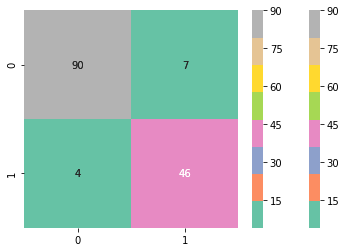

In [60]:
# plot the validation confusion matrix
cm = confusion_matrix(yy_lr, yy_lr_pred)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

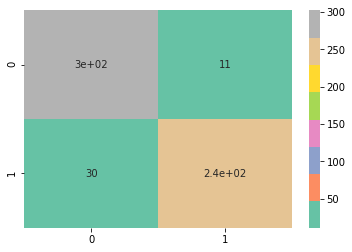

In [64]:
# plot the test confusion matrix
cm = confusion_matrix(yy_test, yy_pred_classes)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [24]:
import scipy.misc
for i in iidx:
    scipy.misc.imsave('/home/xiaoran/Dropbox/CNN/mismatched/'+str(i)+'.png', x_test[i,:])

In [74]:
voxel_by_time = x_test.reshape(x_test.shape[0],32*32*3)

XX_out = X.reshape(X.shape[0],32*32*3)
print('voxel_by_time is', voxel_by_time.shape)
print('XX_out is', XX_out.shape)

voxel_by_time is (689, 3072)
XX_out is (2294, 3072)


In [102]:
# img1 = voxel_by_time[23,:]
img1 = voxel_by_time[23,:]
print('voxel_by_time is', voxel_by_time.shape)
print('XX_out is', XX_out.shape)
print('img1 is', img1.shape)

voxel_by_time is (689, 3072)
XX_out is (2294, 3072)
img1 is (3072,)


In [ ]:
# from PIL import Image

# img = Image.fromarray(X[0,:], 'RGB')
# img.save('my.png')
# img.show()

In [270]:
# from matplotlib import pyplot as plt
# # image = plt.imshow(X[0,:], interpolation='nearest')
# import scipy.misc
# scipy.misc.imsave('/home/xiaoran/Dropbox/CNN/mismatched/ii.png', X[0,:])

In [103]:
for i in iidx2:
    img1 = voxel_by_time[i,:]
    print(np.where(np.all(XX_out == img1,axis=1)))

(array([2057]),)
(array([1229]),)
(array([1874]),)
(array([2177]),)
(array([2033]),)
(array([1706]),)
(array([674]),)
(array([84]),)
(array([1322]),)
(array([1436]),)
(array([76]),)
(array([1775]),)
(array([2126]),)
(array([1553]),)
(array([1985]),)
(array([2291]),)
(array([2174]),)
(array([281]),)
(array([1697]),)
(array([306]),)
(array([1745]),)
(array([382]),)
(array([1637]),)
(array([1619]),)
(array([1289]),)
(array([1310]),)
(array([78]),)
(array([2225]),)
(array([380]),)
(array([1640]),)
(array([2078]),)
(array([1766]),)
(array([277]),)
(array([393]),)
(array([534]),)
(array([1427]),)


In [22]:
(689-89)/689

0.8708272859216255